# SPX analysis

In [33]:
# System init

import pandas as pd
import pandas_datareader.data as pdr
import datetime
import plotly.graph_objects as go
import plotly.io as pio
from dataclasses import dataclass

pio.templates.default = 'plotly_dark'

In [18]:
# Data gathering

end = datetime.datetime.today()
start = end - datetime.timedelta(days=365)
symbols = ['^GSPC', 'TSLA']

df = pdr.DataReader('^GSPC', 'yahoo', start, end)

## Identify the high and then the bottom after the high

In [21]:
high = df['High'].max()
high_date = df['High'].idxmax()
low_date = df.loc['2020-03-16':]['Low'].idxmin()
low = df.loc[low_date]['Low']
diff = low - high
diff_pct = diff / high

analysis = pd.DataFrame(
    index=['SPX'],
    columns=['high', 'high_date', 'low_after_high', 'low_ah_date', 'diff', 'diff_pct'],
    data=[[high, high_date, low, low_date, diff, diff_pct]]
)

display(analysis)


,high,high_date,low_after_high,low_ah_date,diff,diff_pct
SPX,3393.52002,2020-02-19,2280.52002,2020-03-18,-1113.0,-0.327978


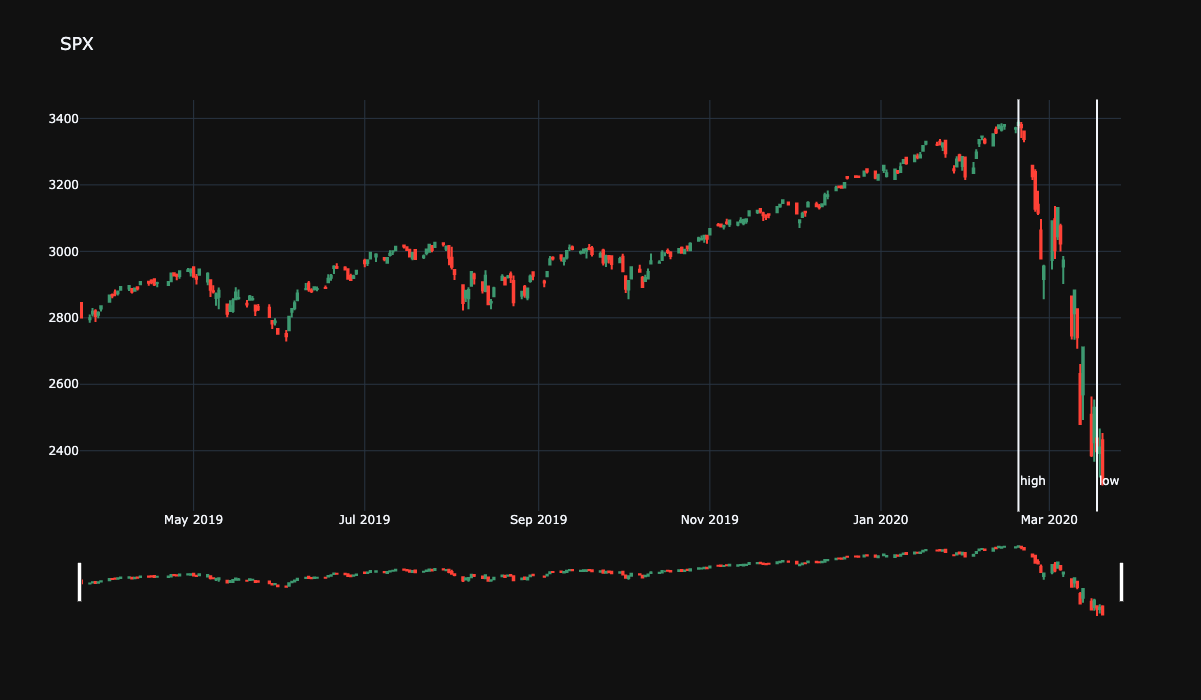

In [37]:
@dataclass
class Marker:
    date: datetime.datetime
    label: str

def make_shape(marker):
    return dict(
        x0=marker.date, 
        x1=marker.date,
        y0=0, y1=1, xref='x', yref='paper',
        line_width=2
    )

def make_annotation(marker):
    return dict(
        x=marker.date,
        y=0.05,
        xref='x',
        yref='paper',
        showarrow=False,
        xanchor='left',
        text=marker.label
    )

def set_markers(fig, markers):
    fig.update_layout(
        shapes = [make_shape(m) for m in markers],
        annotations=[make_annotation(m) for m in markers]
    )

fig = go.Figure(data=[go.Candlestick(x=df.index.to_list(),
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

high_date = analysis.loc['SPX']['high_date']
low_date = analysis.loc['SPX']['low_ah_date']
fig.update_layout(title='SPX', height=700)
set_markers(fig, [
    Marker(date=high_date, label="high"),
    Marker(date=low_date, label="low")
])

fig.show()